# Position detection study: single scatterer

## Library Setup

This notebook analyzes the performance of electromagnetic inverse scattering algorithms using the EISPY2D library. We import the necessary modules for case study management and result visualization.

In [1]:
import sys
sys.path.insert(1, '../../../eispy2d/library/')
import casestudy as cst
import result as rst

This experiment examines the position detection capabilities of various reconstruction algorithms when dealing with strong scatterers. The test case features:

- **Scatterer Type**: Star-shaped object with high contrast
- **Position**: Upper-right corner, rotated 30 degrees  
- **Contrast**: 7 (strong scatterer)
- **Size**: Radius 0.15λb (small relative to wavelength)
- **Challenge**: DNL ≈ 1.7 (above threshold where traditional methods struggle)

The high contrast and small size create challenging conditions where geometry reconstruction becomes difficult, making position detection analysis particularly relevant.

Input name: single.ipt
Configuration file: single.cfg
Images Resolution: 160x160
Scattered field - measurement samples: 80
Scattered field - source samples: 80
Total field - measurement samples: 25600
Total field - source samples: 80
Noise level: 5.00%
Relative Permit. map shape: 160x160
Indicators: ['zeta_s', 'zeta_p', 'objective_function']
Degrees of Non-Linearity: 1.7438


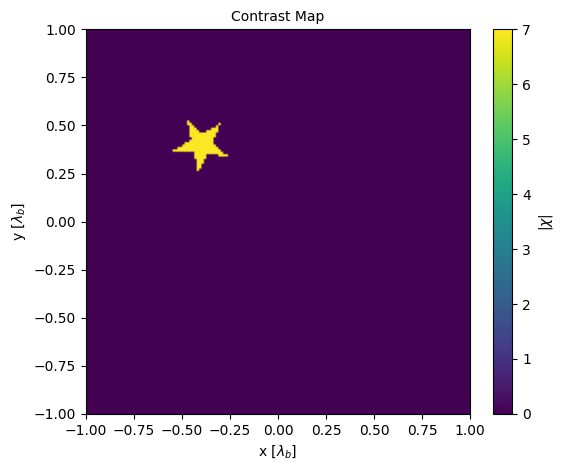

In [2]:
mycase = cst.CaseStudy(import_filename='single.cst', 
                       import_filepath='../../../data/position/single/')
print(mycase.test)
mycase.test.draw(show=True)

## Algorithm Reconstructions

The following visualization shows reconstructions from different algorithms. 

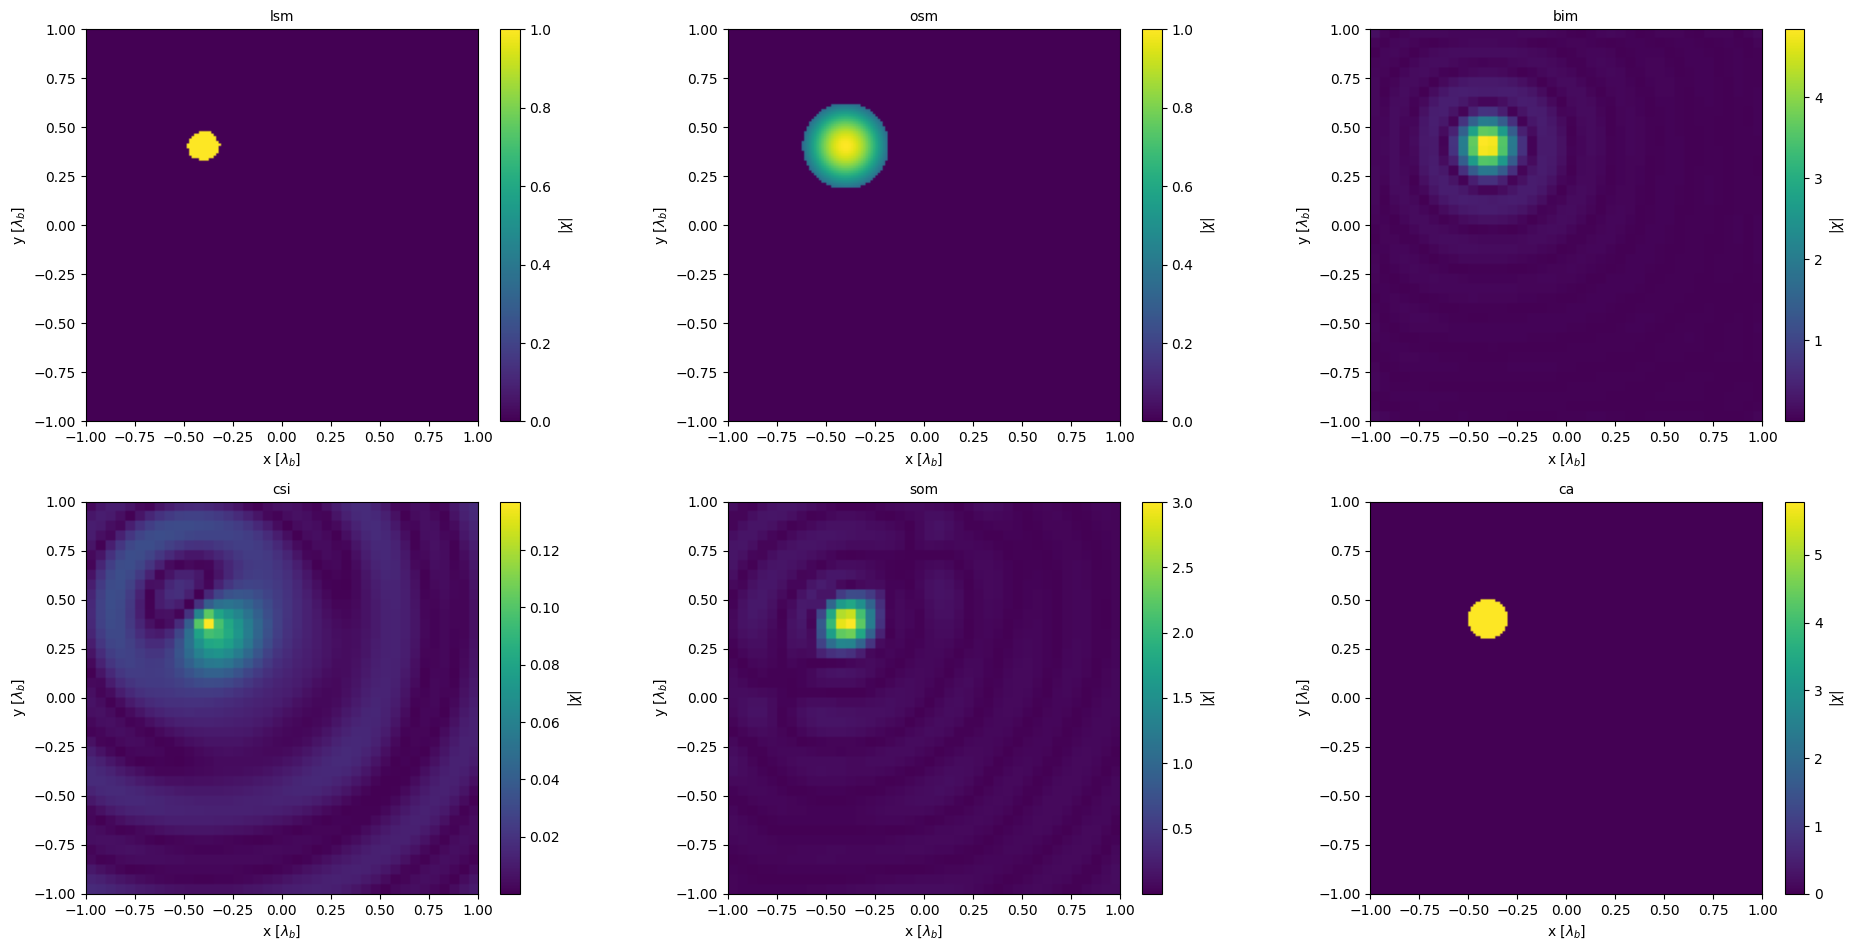

In [3]:
mycase.reconstruction(show=True)

## Position Error Analysis (ζₚ Indicator)

**Interpretation**: Lower values indicate better position detection accuracy.

In [4]:
import pandas as pd

methods = ['LSM', 'OSM', 'BIM', 'CSI', 'SOM', 'CA']

# Create data for the table
data = []
for n in range(len(methods)-1):
    data.append([methods[n], round(mycase.results[n].zeta_p[-1], 2)])
data.append([methods[-1], round(mycase.results[-1].zeta_p[-1], 2)])

# Create DataFrame and display as table
df = pd.DataFrame(data, columns=['Method', 'Zeta_p'])
print(df.to_string(index=False))

Method  Zeta_p
   LSM    0.06
   OSM    0.08
   BIM    0.04
   CSI    4.68
   SOM    0.53
    CA    0.04


### Results Interpretation

**Key Findings:**
- **OSM and CA** achieve the best position detection (≈0.04-0.08% error)
- **BIM** shows moderate performance but acceptable accuracy
- **CSI** demonstrates significantly higher position error (4.68%), indicating difficulty with strong scatterers
- **SOM** shows intermediate performance (0.53%)